In [1]:
import numpy as np
import sklearn.datasets as datasets
import math
import matplotlib.pyplot as plt
%matplotlib inline

Here I set up a K_mean class that can be used to obtain centers of data using the K means model. 

In [2]:
class K_mean():
    #This class has one function, train
    def train(self, x,k):
        """This function runs a K-means model and returns the center of our k clusters
        inputs
        x: An NxD input of data where N is the number of rows and D is the number of columns = features
        k: The number of clusters
        returns: the cluster centers mu_k"""
        n, d = x.shape
        #Start off with some random centers and ensure the centers are same dimension as the data
        centers = np.random.randn(k,d)
        diff = np.inf
        while diff > 10e-5:
            #Keep running our K-means model until new_center-old_center is below the tolerance
            old_centers  = centers.copy()
            #We find the distance from each of the k centers for every row of data
            distances = [np.linalg.norm(data-center, axis = 1) for center in centers]
            distances = np.array(distances)
            #Next I chose the center that was closest to the data point
            center_choice = np.argmin(distances, axis = 0)
            for i in range(k):
                #For the amount of centers, we find the mean of each center based on the data
                #that are closest to the given center
                centers[i] = np.mean(data[np.where(center_choice==i)],axis=0)
            diff = np.linalg.norm(centers-old_centers)
        return centers 
                

In [8]:
#We make our data with 2 features, 9000 entries and 3 different blobs
data, group = datasets.make_blobs(n_features=2, centers=[(-5,0),(5, 0),(0,5)], n_samples=9000)

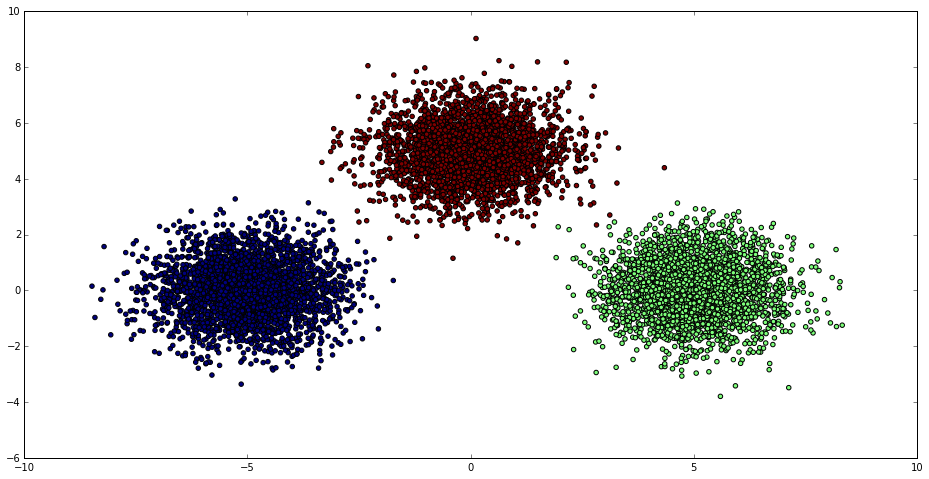

In [9]:
#Here we plot our data 
plt.figure(figsize=(16,8))
scp = plt.scatter(data[:,0], data[:,1],c=group)
plt.show()

# K = 3

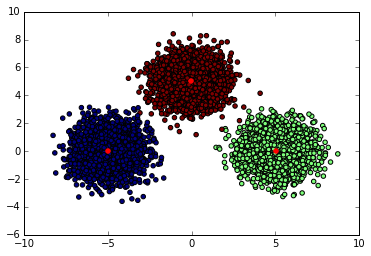

In [5]:
#Here I use the k-mean class to obtain the centers of our data using 3 clusters
problem1 = K_mean()
result = problem1.train(data,3)
#Plot the data and the centers (in red) from our model
plt.scatter(data[:,0], data[:,1],c=group)
plt.scatter(result[:,0], result[:,1], color = 'red')
plt.show()

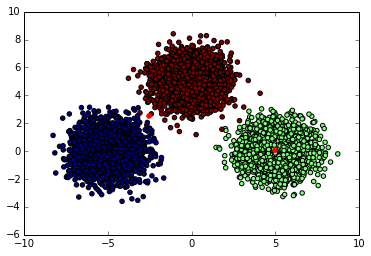

In [7]:
#Here I use the k-mean class to obtain the centers of our data using 2 clusters
problem1 = K_mean()
result = problem1.train(data,2)
#Plot the data and the centers (in red) from our model
plt.scatter(data[:,0], data[:,1], c=group)
plt.scatter(result[:,0], result[:,1], color = 'red')
plt.show()

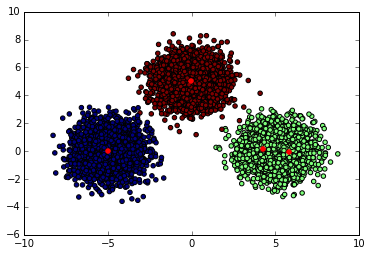

In [6]:
#Here I use the k-mean class to obtain the centers of our data using 4 clusters
problem1 = K_mean()
result = problem1.train(data,4)
#Plot the data and the centers (in red) from our model
plt.scatter(data[:,0], data[:,1],c=group)
plt.scatter(result[:,0], result[:,1], color = 'red')
plt.show()

It is interesting to note that our model works very well when we chose three clusters, which matches our data. However, our model is not entirely accurate, when we have 2 or 4 clusters. This is based on the initializing of our centers with 2 or 4 clusters some of the centers are off from the actual clusters. 